In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    mode='max'
)

# Training
history = model.fit(
    train_images,
    train_labels,
    epochs=100,
    batch_size=128,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping]
)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.8323 - loss: 0.5511 - val_accuracy: 0.9349 - val_loss: 0.1973
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9793 - loss: 0.0647 - val_accuracy: 0.9909 - val_loss: 0.0265
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9858 - loss: 0.0465 - val_accuracy: 0.9913 - val_loss: 0.0262
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9889 - loss: 0.0353 - val_accuracy: 0.9925 - val_loss: 0.0235
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9894 - loss: 0.0320 - val_accuracy: 0.9937 - val_loss: 0.0212
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9907 - loss: 0.0277 - val_accuracy: 0.9945 - val_loss: 0.0171
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9929 - loss: 0.0233 - val_accuracy: 0.9943 - val_loss: 0.0190
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9919 - loss: 0.024

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss:.3f}, Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9952 - loss: 0.0194
Test loss: 0.016, Test accuracy: 0.9962


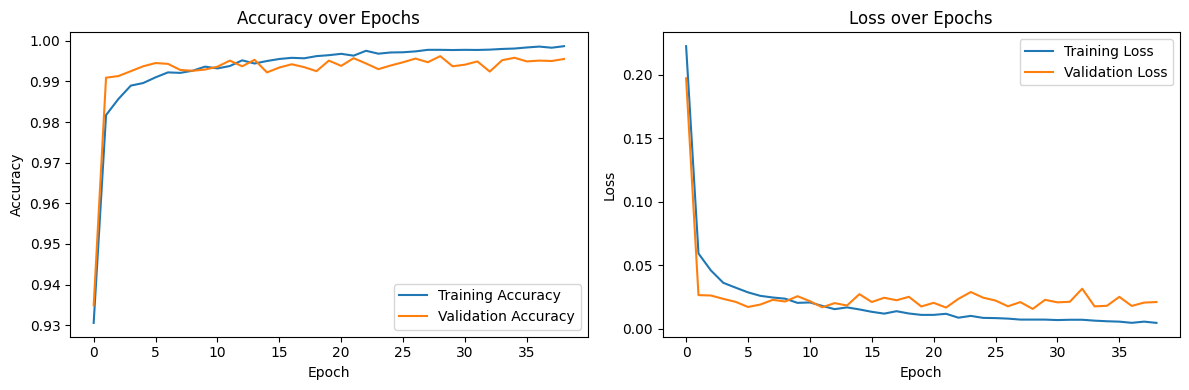

In [7]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Performance Analysis:

-> Train Accuracy: 99.86%

-> Validation Accuracy: 99.55%

-> Test Accuracy: 99.62%


Model Architecture Summary:


-> The model processes input images with an initial shape of (28, 28, 1). Its core structure consists of three sequential blocks, each comprising two convolutional layers. These blocks progressively deepen, starting with 32 filters, then moving to 64, and finally 128 filters, effectively extracting hierarchical features.

-> Downsampling: MaxPooling2D((2, 2)) layers are used after every two convolutional layers.

-> Normalization: BatchNormalization layers are used after every convolutional layer and after the first dense layer.

-> Regularization: Dropout layers are applied with a rate of 0.25 after each convolutional block and 0.5 after the dense layer.

-> Final feature reduction: Flatten() layer

-> The network culminates in a dense output layer with 10 units, utilizing a softmax activation function to produce the final class probabilities.


Component Value

-> Optimizer: Adam(learning_rate=0.001)

-> Loss: sparse_categorical_crossentropy

-> Batch Size: 128

-> Epochs: Up to 100 (early stopped at 39)

-> Learning Rate Schedule: EarlyStopping (monitor='val_accuracy', patience=10, restore_best_weights=True, mode='max')

-> Regularization: Dropout (0.25 and 0.5) and BatchNormalization

-> Final Downsampling: MaxPooling2D

Observations:

-> The model effectively uses convolutional layers to extract features from the MNIST dataset.

-> Batch normalization and dropout are employed to improve model stability and prevent overfitting.

-> Early stopping helps in identifying the optimal number of training epochs to achieve good generalization performance.

-> The model demonstrates high accuracy on the MNIST dataset, indicating its effectiveness for image classification tasks.